# Setup and Load Data

## Installing dependancies

In [1]:
%pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
altair                    5.2.0
asttokens                 2.4.1
astunparse                1.6.3
attrs                     23.2.0
blinker                   1.7.0
cachetools                5.3.3
certifi                   2024.2.2
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.1
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
dm-tree                   0.1.8
executing                 2.0.1
flatbuffers               23.5.26
fonttools                 4.49.0
gast                      0.5.4
gitdb                     4.0.11
GitPython                 3.1.42
google-pasta              0.2.0
grpcio                    1.62.0
h5py                      3.10.0
idna                      3.6
ipykernel                 6.29.3
ipython              

In [4]:
#!pip install --upgrade tensorflow

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [7]:
# Avoid OOM(OutOfMemoryError) errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu)

## Remove Dodgy Images

In [8]:
import cv2
import imghdr #to check file extension
from matplotlib import pyplot as plt

C:\Users\Outis Lupin\AppData\Local\Temp\ipykernel_11568\2645592762.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr #to check file extension


In [9]:
data_dir = 'data'
os.listdir(data_dir) #return every folders

['happy', 'sad']

In [10]:
os.listdir(os.path.join(data_dir, 'happy')) #return every subfolders

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '71hBPTAhIXL._AC_UF10001000_QL80_.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'community-young-people-happy-together_23-2148431416.jpg',
 'compassion-900x387.jpg',
 'diverse-happy-people-united-concept-101678776.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821-1490x838.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'goup-happy-people-35582464.jpg',
 'goup-happy-people-group-j

In [11]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [12]:
img = cv2.imread(os.path.join('data','happy','56f455011e0000b300705475.jpeg'))
img

array([[[230, 242, 248],
        [230, 242, 248],
        [230, 242, 248],
        ...,
        [ 35,  36,  50],
        [ 32,  33,  47],
        [ 33,  33,  47]],

       [[230, 242, 248],
        [230, 242, 248],
        [230, 242, 248],
        ...,
        [ 34,  36,  47],
        [ 32,  34,  45],
        [ 32,  32,  44]],

       [[230, 242, 248],
        [230, 242, 248],
        [230, 242, 248],
        ...,
        [ 33,  35,  46],
        [ 31,  33,  44],
        [ 32,  32,  44]],

       ...,

       [[172, 190, 173],
        [175, 192, 178],
        [176, 193, 180],
        ...,
        [ 15,  12,   8],
        [  5,   2,   0],
        [ 22,  17,  14]],

       [[173, 192, 173],
        [176, 194, 177],
        [176, 194, 177],
        ...,
        [ 10,   7,   3],
        [ 10,   7,   3],
        [ 15,  10,   7]],

       [[174, 193, 174],
        [176, 195, 176],
        [177, 195, 178],
        ...,
        [ 10,   7,   3],
        [ 19,  16,  12],
        [  8,   3,   0]]

In [13]:
img.shape #3 means its a coloured picture

(534, 949, 3)

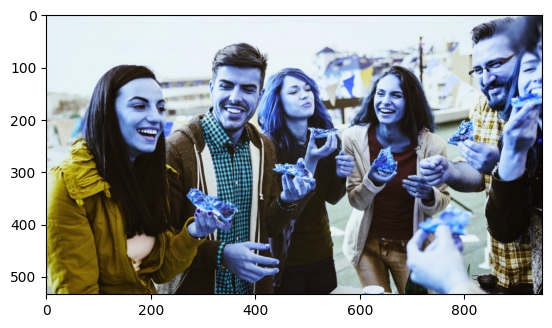

In [14]:
plt.imshow(img) #openCV read in an image as BGR(Blue Green Red)
plt.show()

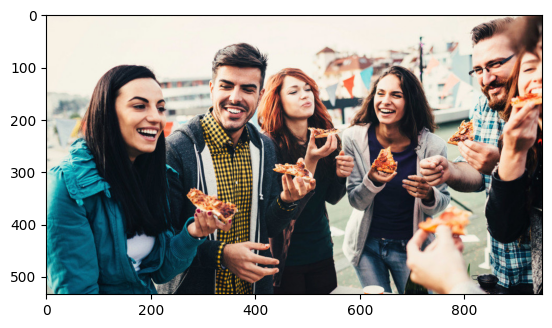

In [15]:
#bgr to rgb
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [16]:
for image_class in os.listdir(data_dir): #return the subfolders in data folder
    for image in os.listdir(os.path.join(data_dir, image_class)): #return all subfolders such as images
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #load into cv
            tip = imghdr.what(image_path) #then check the image extention 
            #if theres an image that not relted to the list(image_exts) it will remove
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            #os.remoce(image_path)
            

## Load Data

In [17]:
#tf.data.Dataset?? #this is a dataset API from tensorflow

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#tf.keras.utils.image_dataset_from_directory?? # this reshape the images
# tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128)), this is an example that you do change according to your PC performance

In [20]:
# building the data pipeline
data = tf.keras.utils.image_dataset_from_directory('data') 
# this isnt a dataset which is pre-loaded into memory already
# this is actually a generator
# this is a pipeline that generates data

Found 126 files belonging to 2 classes.


In [21]:
# allowing to access the data pipeline
data_iterator = data.as_numpy_iterator() # to grab the data from the pipeline is to convet into a numpy iterator


In [22]:
# accessing the data pipeline
batch = data_iterator.next() # also this will get another batch from the iterator

In [23]:
#images represented as numpy arrays
batch[0]
batch[0].shape # this will get (32,256,256) it means the image size it reshaped by the above code
len(batch) # this will give 2, it means image and the label that give to the image

2

In [24]:
# labels
# Class 1 = sad
# Class 0 = happy
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0])

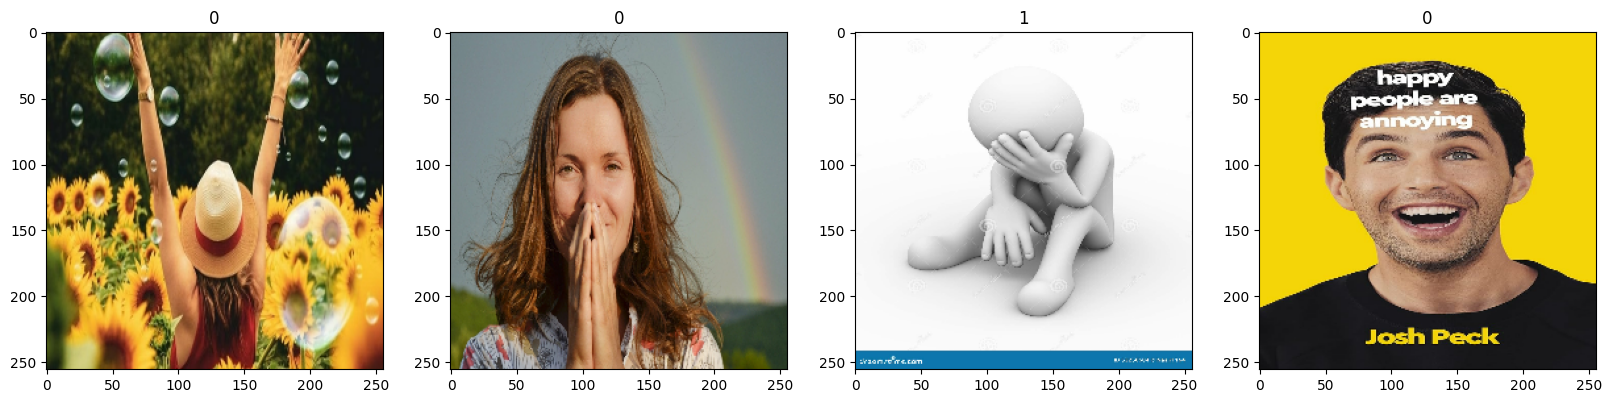

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#### In the below 2 line i did the scale part but since this is data pipeline we cant do again and again so this method won't work

In [26]:
scaled = batch[0] / 255

In [27]:
scaled.max()

1.0

# Preprocess Data

## Scale Data

In [28]:
data = data.map(lambda x,y: (x/255, y))
# In here the data.map allows to perform the transformation in pipeline
# x represents images such as independent features
# y is the target variable

In [29]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [30]:
batch[0].max()

1.0

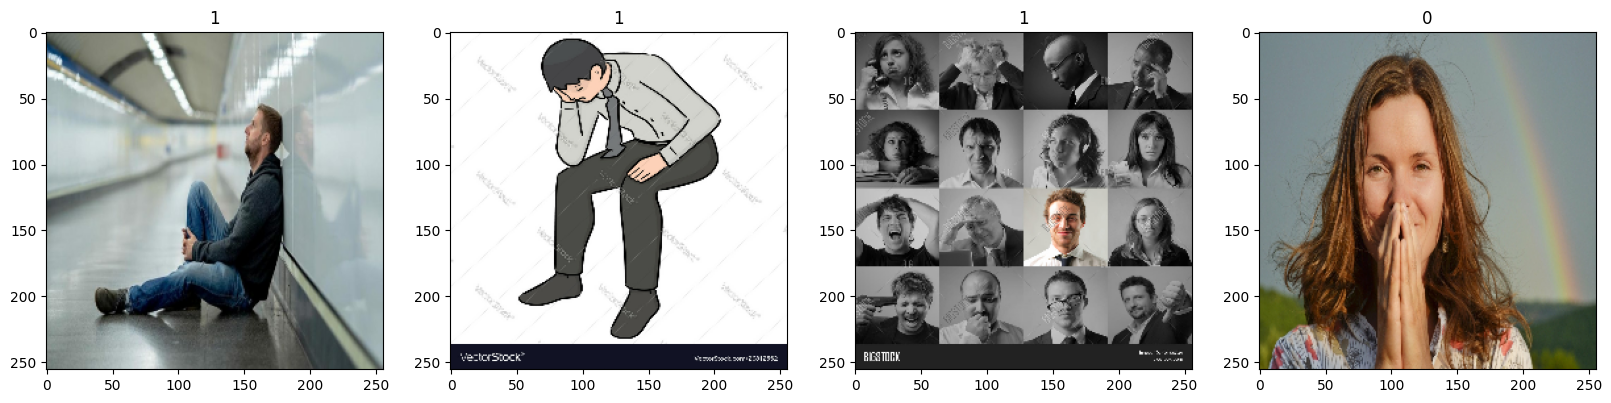

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [32]:
len(data)

4

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [34]:
train = data.take(train_size) # how much data going to take in
val = data.skip(train_size).take(val_size) # skip batches that already allocated to the trainning, then going to take in
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Outis Lupin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [40]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5312 - loss: 0.8541 - val_accuracy: 0.5938 - val_loss: 0.6438
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 888ms/step - accuracy: 0.4583 - loss: 0.7729 - val_accuracy: 0.5312 - val_loss: 0.6767
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 840ms/step - accuracy: 0.5312 - loss: 0.7097 - val_accuracy: 0.9375 - val_loss: 0.6074
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 889ms/step - accuracy: 0.8750 - loss: 0.6157 - val_accuracy: 0.7812 - val_loss: 0.5874
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 868ms/step - accuracy: 0.8229 - loss: 0.5700 - val_accuracy: 0.6875 - val_loss: 0.5175
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 901ms/step - accuracy: 0.7292 - loss: 0.5140 - val_accuracy: 0.5625 - val_loss: 0.6010
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 840ms/step - accuracy: 0.6562 - loss: 0.5200 - val_accuracy: 0.9688 - val_loss: 0.3700
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 838ms/step - accuracy: 0.8958 - loss: 0.4220 - val_accuracy: 0.8125 - val_loss: 0.

In [45]:
hist.history

{'accuracy': [0.5625,
  0.421875,
  0.609375,
  0.875,
  0.828125,
  0.6875,
  0.6875,
  0.890625,
  0.84375,
  0.90625,
  0.96875,
  0.9375,
  0.953125,
  0.96875,
  0.9375,
  0.984375,
  0.96875,
  0.953125,
  0.96875,
  0.984375],
 'loss': [0.9320145845413208,
  0.7995860576629639,
  0.6974433660507202,
  0.6094497442245483,
  0.5567097663879395,
  0.5325221419334412,
  0.506557822227478,
  0.4324578642845154,
  0.4211671054363251,
  0.3057589530944824,
  0.24899345636367798,
  0.2027430236339569,
  0.20448091626167297,
  0.16861534118652344,
  0.15322741866111755,
  0.07867293059825897,
  0.12458571791648865,
  0.11818279325962067,
  0.10102032124996185,
  0.05685562267899513],
 'val_accuracy': [0.59375,
  0.53125,
  0.9375,
  0.78125,
  0.6875,
  0.5625,
  0.96875,
  0.8125,
  0.9375,
  0.96875,
  0.90625,
  0.875,
  0.9375,
  0.875,
  0.9375,
  0.96875,
  0.96875,
  0.96875,
  1.0,
  0.96875],
 'val_loss': [0.643804669380188,
  0.6766550540924072,
  0.6073686480522156,
  0.587361

## Plot Performance

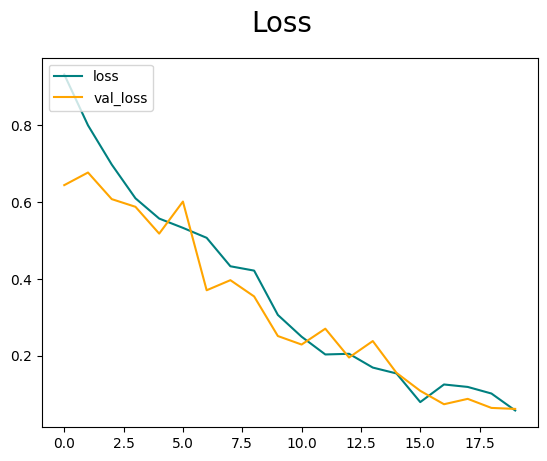

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

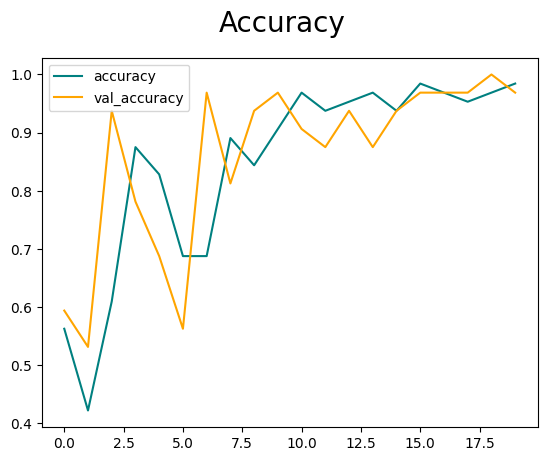

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# Evaluate Performance

## Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


In [54]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.875, Accuracy:0.9333333373069763


## Test

In [55]:
import cv2

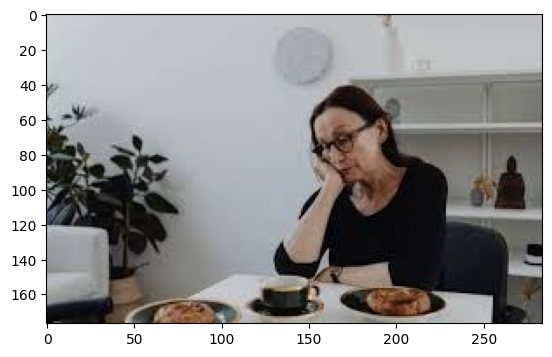

In [62]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

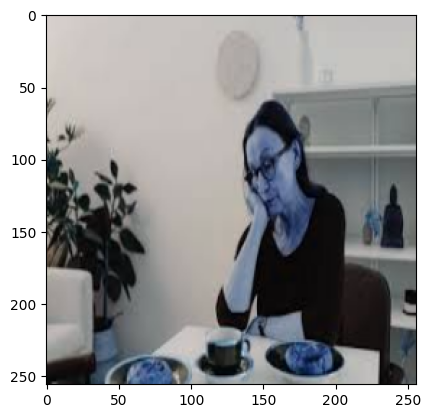

In [63]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # we use expan_dims method bcs the method expecting a batch of imgs not a single imgs for that we use this methos, and also /255 means we are scaling the image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [65]:
yhat

array([[0.5989815]], dtype=float32)

In [66]:
if yhat > 0.5:
    print("Predicted class is sad")
else:
    print("Predicted class is Happy")

Predicted class is sad


# Save the Model

## Save the Model

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save(os.path.join('models', 'happysadmodel.h5'))

## Reloading the saved model

In [69]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [70]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [71]:
if yhat_new > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad
